In [7]:
import sys
import numpy as np
sys.path.append("../../")

from lib.utils import load
from lib.dicom import read_dcm
from lib.plot import plot_grid, plot_volume
from lib.ct.segmentation import segment
from lib.ct.localizer import get_localizer
from lib.cv import project

ct_paths = load("../output/ct_paths.pkl")
ct_paths.head(3)

,Subject,med,lung,localizer
0,1,"(/data/covid_ct/subject_1/56364398.dcm, /data/...","(/data/covid_ct/subject_1/56364571.dcm, /data/...","(/data/covid_ct/subject_1/56364823.dcm,)"
1,10,"(/data/covid_ct/subject_10/56520524.dcm, /data...","(/data/covid_ct/subject_10/56520474.dcm, /data...","(/data/covid_ct/subject_10/56520202.dcm,)"
2,100,"(/data/covid_ct/subject_100/56082665.dcm, /dat...","(/data/covid_ct/subject_100/56082410.dcm, /dat...","(/data/covid_ct/subject_100/56082661.dcm,)"


In [8]:
"""
Read input CTs
"""

med_paths, loc_paths = ct_paths.iloc[0]["med"], ct_paths.iloc[0]["localizer"]
med_sitk, med_np = read_dcm(med_paths)
loc_np = read_dcm(loc_paths)[1][0]

In [9]:
"""
Segmentation step
"""

lung_mask, body_mask, bones_mask = segment(med_sitk, med_np, bone_threshold=70)

interactive(children=(IntSlider(value=1, description='val', max=422), Output()), _dom_classes=('widget-interac…

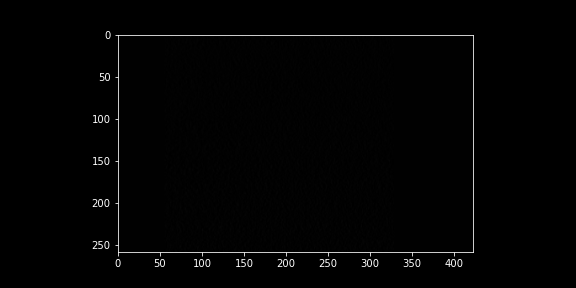

In [14]:
plot_volume(med_np, body_mask, axis=1)

interactive(children=(IntSlider(value=1, description='val', max=258), Output()), _dom_classes=('widget-interac…

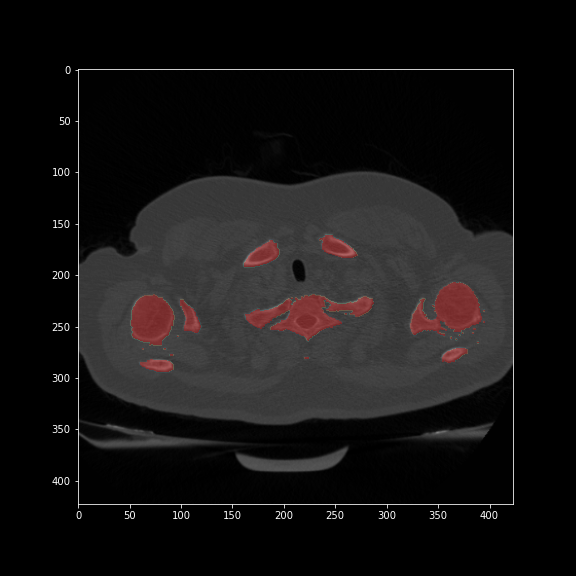

In [11]:
plot_volume(med_np, bones_mask, axis=0)

interactive(children=(IntSlider(value=1, description='val', max=258), Output()), _dom_classes=('widget-interac…

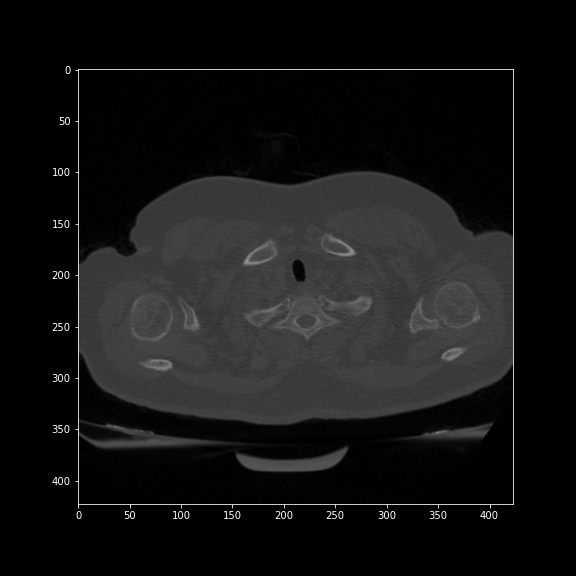

In [16]:
plot_volume(med_np, lung_mask, axis=0)

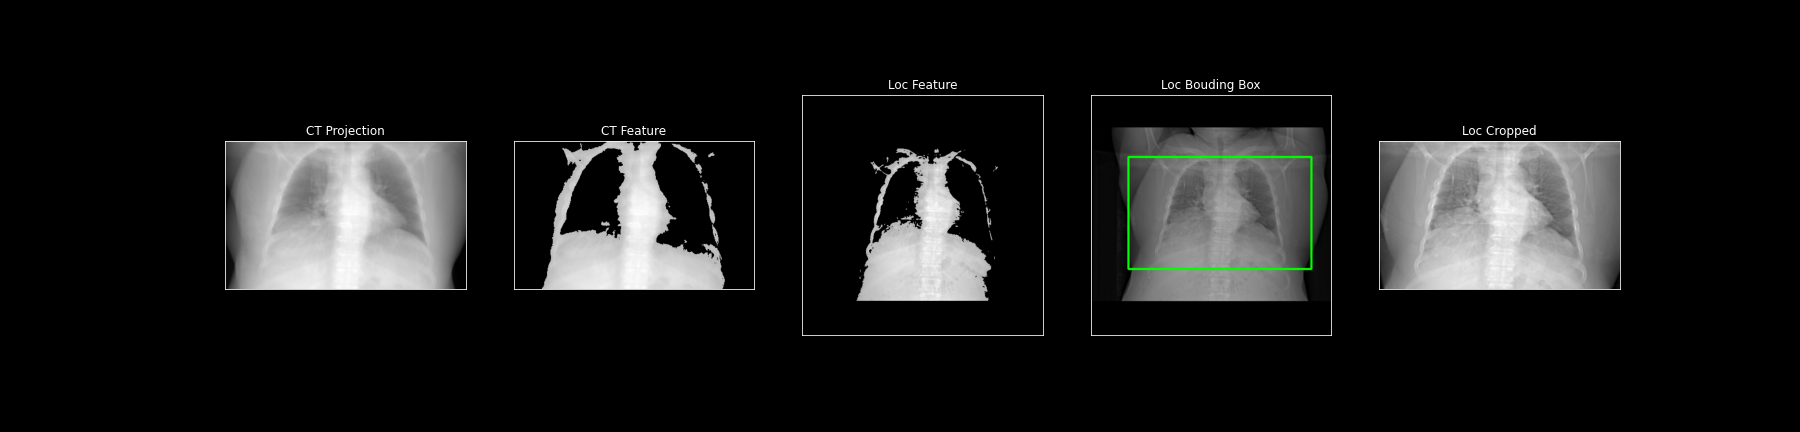

In [12]:
"""
Get Aligned Localizer Image
"""

loc_results = get_localizer(med_np, loc_np)
plot_grid(loc_results, titles=("CT Projection", "CT Feature", "Loc Feature", "Loc Bouding Box", "Loc Cropped"))

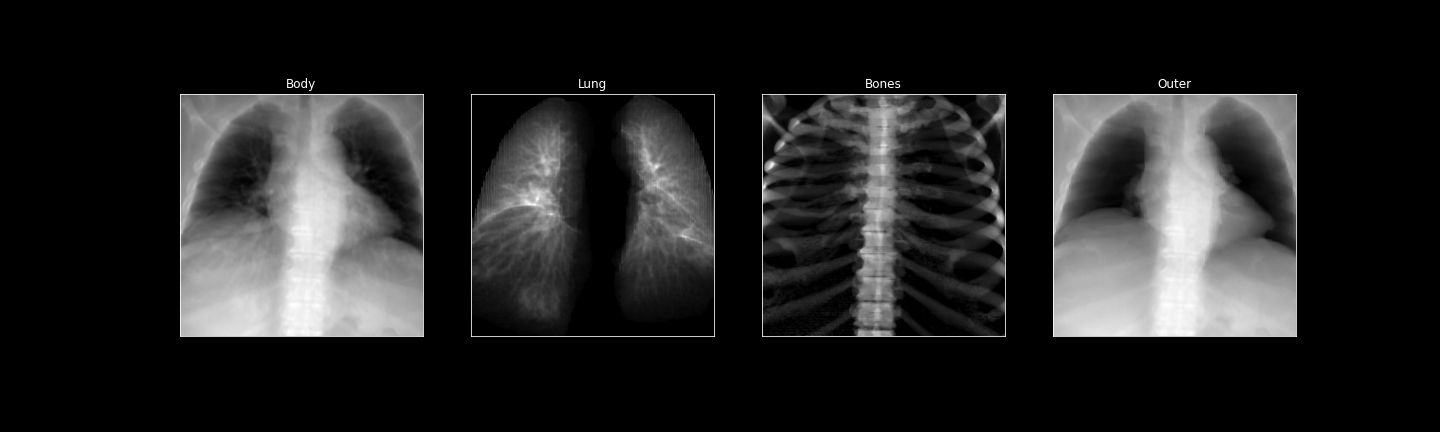

In [13]:
"""
Get Projections
"""

body = project(med_np * body_mask, crop_size=256)
lung = project(med_np * lung_mask, crop_size=256)
bones = project(med_np * bones_mask, crop_size=256)
chest = project(med_np * body_mask * (~lung_mask), crop_size=256)
plot_grid([body, lung, bones, chest], ("Body", "Lung", "Bones", "Outer"))